# PRÁCTICA 11: MÁQUINAS DE VECTORES SOPORTE (SVM)

## CQFidalgo

In [16]:
from sklearn.datasets import make_blobs

In [17]:
X,Y = make_blobs(n_samples=500, centers=5, n_features=2) #Generamos los datos (500 muestras con dos atributos)

In [18]:
from sklearn.model_selection import train_test_split

#Creamos los conjuntos de entrenamiento usando holdout(2/3,1/3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.33) 

A continuación muestro el resultado de dos pruebas con diferentes modelos, de esas pruebas elegimos los dos peores y 2 de entre los mejores ya que hay empate.

In [19]:
import pandas as pd

table = pd.read_csv('Resultados_SVM.csv',sep=';')
table

,C,Kernel,Degree,Gamma,Score 1,Score 2
0,1,linear,3,scale,1,"0,9515"
1,1,rbf,3,scale,1,"0,9515"
2,1,poly,3,scale,1,"0,9575"
3,1,sigmoid,3,scale,"0,9636","0,5818"
4,1,linear,3,auto,1,"0,9515"
5,1,rbf,3,auto,1,"0,9454"
6,1,poly,3,auto,1,"0,9272"
7,1,sigmoid,3,auto,"0,303","0,6545"
8,"0,1",linear,3,scale,1,"0,9575"
9,"1,9",linear,3,scale,"0,9939","0,9515"


In [20]:
from sklearn.svm import SVC

#Construimos los diferentes modelos (2 mejores y 2 peores) y los entrenamos con los conjuntos de entrenamiento
model1 = SVC(C=1.0, kernel='poly', gamma='scale', degree=3)
model1.fit(X_train, Y_train)

model2 = SVC(C=0.4, kernel='rbf', gamma='scale', degree=3)
model2.fit(X_train, Y_train)

model3 = SVC(C=1, kernel='sigmoid', gamma='scale', degree=3)
model3.fit(X_train, Y_train)

model4 = SVC(C=1.0, kernel='sigmoid', gamma='auto', degree=3)
model4.fit(X_train, Y_train)

SVC(gamma='auto', kernel='sigmoid')

In [21]:
model1.score(X_test, Y_test)

0.9575757575757575

In [22]:
model2.score(X_test, Y_test)

0.9575757575757575

In [23]:
model3.score(X_test, Y_test)

0.7515151515151515

In [24]:
model4.score(X_test, Y_test)

0.30303030303030304

In [25]:
import numpy as np

#Y_predict = model.predict(X_test)
#np.sum(Y_predict == Y_test)/Y_test.shape[0]

In [26]:

import matplotlib.pyplot as plt

class SvmViewer:
    def __init__(self):
        self.cm = plt.cm.RdBu
    
    def plot(self, X, Y, model, h=0.2):
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

        if len(np.unique(Y)) > 2:
            Z = np.argmax(model.decision_function(np.c_[xx.ravel(), yy.ravel()]), axis=1)
        else:
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=self.cm, alpha=.8)
        plt.scatter(X[:,0], X[:,1], c=Y)
        plt.show()

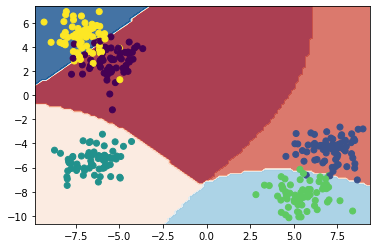

In [27]:
SvmViewer().plot(X_train, Y_train, model1)

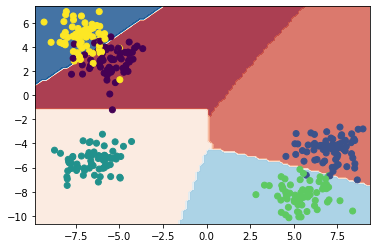

In [28]:
SvmViewer().plot(X_train, Y_train, model2)

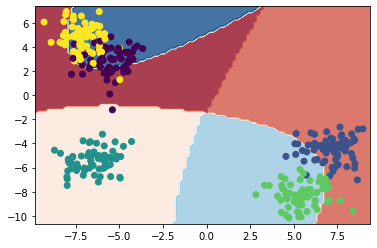

In [29]:
SvmViewer().plot(X_train, Y_train, model3)

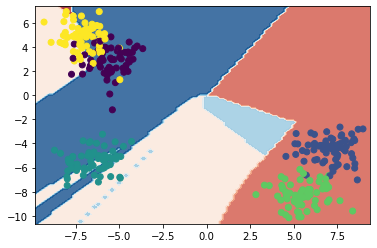

In [30]:
SvmViewer().plot(X_train, Y_train, model4)

Podemos comprobar que el ultimo modelo es claramente un desastre, ya que solo tiene un 30% de acierto. 